# 权重衰减是对抗过拟合的有效手段

In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import sys
sys.path.append('..')
import library.d2lzh_pytorch as d2l

In [2]:
n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train, :], labels[n_train:, :]

In [10]:
batch_size, num_epochs, lr = 1, 100, 0.003
loss = d2l.squared_loss
dataset = torch.utils.data.TensorDataset(train_features, train_labels)  
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
def fit_and_plot_pytorch(wd):
    """

    :param wd: 权重衰减参数
    """
    net = nn.Linear(num_inputs, 1)
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params=[net.weight], lr=lr,  weight_decay=wd) # 对权重参数衰减
    optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)
    train_ls, test_ls = [], []
    
    for _ in range(num_epochs):
        for X, y in iter(train_iter):
            l = loss(net(X), y).mean()
            optimizer_w.zero_grad()
            optimizer_w.zero_grad()
            l.backward()
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())

L2 norm of w: 13.776496887207031


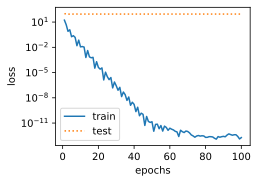

In [11]:
fit_and_plot_pytorch(0)

L2 norm of w: 0.02770332805812359


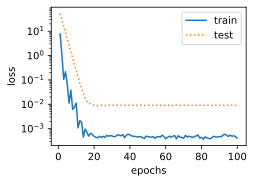

In [15]:
fit_and_plot_pytorch(5)